# 1. Data Generator

In [1]:
import pandas as pd
import numpy as np
import math

RANDOM_STATE = 147369
np.random.seed(RANDOM_STATE)

# Stage 1

### Load data

In [2]:
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')
df_gym.shape[0]

973

In [3]:
df_gym['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

We are left with the cardio sessions alone, because that is our use case. We are left with 255 cardio sessions.

In [4]:
df_gym = df_gym[df_gym['Workout_Type'] == 'Cardio'].reset_index(drop=True)
df_gym.shape[0]

255

In [5]:
df_gym['Workout_Type'].unique()

array(['Cardio'], dtype=object)

In [6]:
df_hr = pd.read_csv('data/heart_rate.csv')

## Synthetic data

### Obtain standard deviation

In [7]:
# Convert de dataframe columns into lists
subject_1 = df_hr.iloc[:, 0].tolist()
subject_2 = df_hr.iloc[:, 1].tolist()
subject_3 = df_hr.iloc[:, 2].tolist()
subject_4 = df_hr.iloc[:, 3].tolist()



#Remove nans from the lists
subject_1 = [x for x in subject_1 if str(x) != 'nan']
subject_2 = [x for x in subject_2 if str(x) != 'nan']
subject_3 = [x for x in subject_3 if str(x) != 'nan']
subject_4 = [x for x in subject_4 if str(x) != 'nan']

In [8]:
print('Measurements for subject 1:', len(subject_1))
print('Measurements for subject 2:', len(subject_2))
print('Measurements for subject 3:', len(subject_3))
print('Measurements for subject 4:', len(subject_4))

Measurements for subject 1: 1800
Measurements for subject 2: 1800
Measurements for subject 3: 950
Measurements for subject 4: 891


In [9]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [round(np.mean(subject_1), 2), round(np.max(subject_1), 2), round(np.min(subject_1), 2), round(np.std(subject_1), 2), ]
subject_2_data = [round(np.mean(subject_2), 2), round(np.max(subject_2), 2), round(np.min(subject_2), 2), round(np.std(subject_2), 2)]
subject_3_data = [round(np.mean(subject_3), 2), round(np.max(subject_3), 2), round(np.min(subject_3), 2), round(np.std(subject_3), 2)]
subject_4_data = [round(np.mean(subject_4), 2), round(np.max(subject_4), 2), round(np.min(subject_4), 2), round(np.std(subject_4), 2)]

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.head()


,Mean,Max,Min,Std
Subject 1,92.60,106.76,73.44,5.49
Subject 2,96.64,104.90,80.21,5.69
Subject 3,58.67,75.47,52.08,3.41
Subject 4,58.52,77.42,52.92,3.48


In [10]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[0])) #Standard deviation represented as a its ratio of the range between the mean and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[0]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[0]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[0]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.39
Subject 2,96.64,104.90,80.21,5.69,0.69
Subject 3,58.67,75.47,52.08,3.41,0.20
Subject 4,58.52,77.42,52.92,3.48,0.18


In [11]:
mean_std_ratio_avg_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_avg_max)

0.36578887474025085


In [12]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[2])) #Standard deviation represented as a its ratio of the range between the minimum and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[2]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[2]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[2]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.16
Subject 2,96.64,104.90,80.21,5.69,0.23
Subject 3,58.67,75.47,52.08,3.41,0.15
Subject 4,58.52,77.42,52.92,3.48,0.14


In [13]:
mean_std_ratio_min_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_min_max)

0.17072102970888003


The mean ratio of the standar deviation with respect to the interval between average and maximum heart rate values is 36.58% and between minimum and maximum is 17.07%.

### Generate synthetic data

#### Generation study

In [14]:
from scipy.stats import truncnorm

def genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N):
    a = (min_val - avg) / std
    b = (max_val - avg) / std

    genarated_heart_rates = truncnorm.rvs(a, b, loc=avg, scale=std, size=N)

    return genarated_heart_rates

In [ ]:
import scipy.stats
import matplotlib.pyplot as plt


def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    mean_std = (mean - min_val) / scale
    var_std = (std / scale) ** 2

    alpha = ((1-mean_std) / var_std  - 1/mean_std) * mean_std**2

    beta_param = alpha * (1 / mean_std - 1)

    return scipy.stats.beta(a= alpha, b=beta_param, loc=min_val, scale=scale)

def genarate_heart_rates_beta(min_val, max_val, avg, std, N, plot=False):
    my_dist = my_distribution(min_val, max_val, avg, std)
    
    generated_numbers = my_dist.rvs(size=N)
    if plot:  
        x = np.linspace(min_val, max_val, 100)
        plt.plot(x, my_dist.pdf(x))
    return generated_numbers

In [17]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
1,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
2,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
3,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07
4,57,Male,112.5,1.61,195,165,61,1.24,1013.0,Cardio,22.1,2.7,3,2,43.40


Min: 64, Max: 169, Avg: 136, Std: 12.071032866428277, N: 64
Using truncated normal distribution
Generated average: 133.90
Generated std: 10.74
Generated min: 116.21
Generated max: 160.60


Using beta distribution
Generated average: 137.16
Generated std: 11.87
Generated min: 109.68
Generated max: 162.89


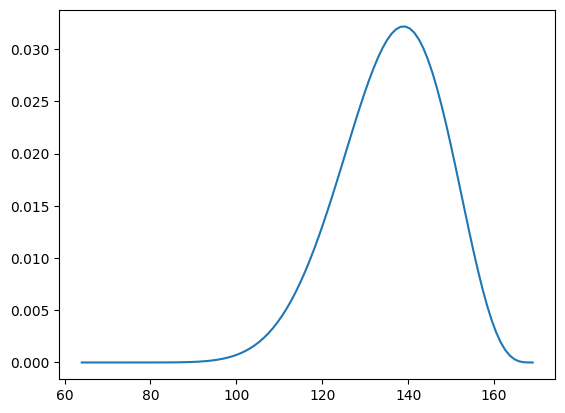

In [18]:
min_val, max_val, avg, N = df_gym.iloc[3]['Resting_BPM'], df_gym.iloc[3]['Max_BPM'], df_gym.iloc[3]['Avg_BPM'], math.trunc(df_gym.iloc[3]['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max_val - avg)
print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
genarated_heart_rates_truncnorm = genarate_heart_rates_truncnorm(min_val, max_val, avg, std, N)

print("Using truncated normal distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_truncnorm, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_truncnorm):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_truncnorm):.2f}")
genarated_heart_rates_beta = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

print("\n\nUsing beta distribution")
print(f"Generated average: {np.mean(genarated_heart_rates_beta):.2f}")
print(f"Generated std: {np.std(genarated_heart_rates_beta, ddof=1):.2f}")
print(f"Generated min: {np.min(genarated_heart_rates_beta):.2f}")
print(f"Generated max: {np.max(genarated_heart_rates_beta):.2f}")


In [19]:
random_indices = np.random.RandomState(RANDOM_STATE).randint(0, df_gym.shape[0], 10)
print(random_indices)

[ 13 162 227 183 138 184  99  18 205 116]


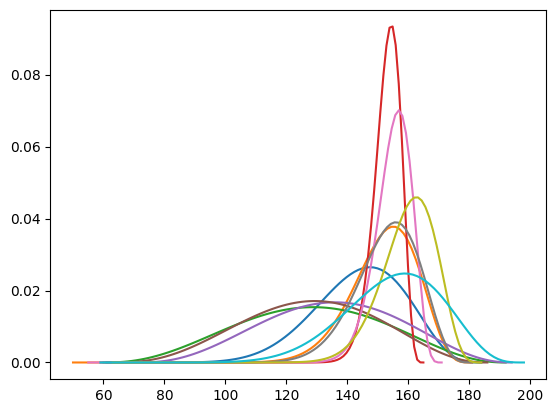

In [20]:
for index, row in df_gym.iloc[random_indices].iterrows():
    min_val, max_val, avg, N = row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60)
    std = mean_std_ratio_avg_max * (max_val - avg)
    
    try:
        genarated_heart_rates_session = genarate_heart_rates_beta(min_val, max_val, avg, std, N, True)

        # print(f"Min: {min_val}, Max: {max_val}, Avg: {avg}, Std: {std}, N: {N}")
        
        # print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
        # print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
        # print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
        # print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

        # print('\n')
    except Exception as e:
        print(f"Error for index {index}: {e}")
        continue


#### Data generation

In [21]:
def generate_heart_rates(min_val, max_val, avg, N, std_ratio):
    std = std_ratio * (max_val - avg)
    try:
        return genarate_heart_rates_beta(min_val, max_val, avg, std, N, False)
    
    except Exception as e:
        return None

In [22]:
clients_heart_rates = []
valid_indexes = []
user_final_id = 0

for index, row in df_gym.iterrows():
    heart_rates = generate_heart_rates(row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60), mean_std_ratio_avg_max)
    
    if heart_rates is not None:
        for hr in heart_rates:
            clients_heart_rates.append({
                'User_ID': user_final_id,
                'Heart_Rate': int(hr)
            })
        valid_indexes.append(index)
        user_final_id += 1

df_pulses = pd.DataFrame(clients_heart_rates)
df_gym_members_with_hr = df_gym.loc[valid_indexes].reset_index(drop=True)

C:\Users\danih\AppData\Local\Temp\ipykernel_9548\845120679.py:26: RuntimeWarning: invalid value encountered in scalar divide
  alpha = ((1-mean_std) / var_std  - 1/mean_std) * mean_std**2


In [23]:
df_pulses.to_csv('data/gym_members_heart_rates.csv', index=False)
df_gym_members_with_hr.to_csv('data/modified_gym_members_exercise_tracking.csv', index=False)

# Stage 2

In [24]:
df_users_raw = pd.read_csv('data/Million Song Dataset kaggle/User Listening History.csv')
df_music = pd.read_csv('data/Million Song Dataset kaggle/Music Info.csv')

We only take into account users that have listened to at least 10 songs

In [25]:
df_user_counts = df_users_raw['user_id'].value_counts().reset_index()
df_user_counts.columns = ['user_id', 'count']

In [26]:
df_users = df_users_raw[df_users_raw['user_id'].isin(df_user_counts[df_user_counts['count'] > 5]['user_id'])].reset_index(drop=True)
df_users.shape

(8332242, 3)

In [27]:
df_users

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
...,...,...,...
8332237,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332238,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332239,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
8332240,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


In [28]:
df_users.to_csv('data/User Listening History_modified.csv', index=False)

# Web app

To reduce file size, we will only store the music history of an amount of people equal to the amount of people we have heart data of, which are the people who did a cardio session

In [7]:
df_gym_members_with_hr = pd.read_csv('data/modified_gym_members_exercise_tracking.csv')

In [8]:
df_users = pd.read_csv('data/User Listening History_modified.csv')

In [10]:
df_users['user_id'].unique().shape[0]

464573

In [12]:
first_250_users = df_users['user_id'].unique()[:len(df_gym_members_with_hr)]
df_users_reduced = df_users[df_users['user_id'].isin(first_250_users)].reset_index(drop=True)

In [ ]:
df_users_reduced.to_csv('data/User Listening History_reduced.csv', index=False)